In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths for datasets
BACKGROUND_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\input\backgrounds"
WEED_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\input\foregrounds\allweeds\weed"
OUTPUT_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output"  # New output directory

# Create output directories if they don't exist
os.makedirs(os.path.join(OUTPUT_DIR, "images"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "masks"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "visualization"), exist_ok=True)

def load_images(directory, size=(256, 256), alpha=False):
    """Load and resize images from a directory."""
    images = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED if alpha else cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, size)
                images.append(img)
    return np.array(images)

def save_batch(images, masks, start_idx):
    """Save generated images and masks to disk."""
    for idx, (image, mask) in enumerate(zip(images, masks)):
        # Save synthetic image
        image_path = os.path.join(OUTPUT_DIR, "images", f"synthetic_{start_idx + idx}.png")
        cv2.imwrite(image_path, image)
        
        # Save mask
        mask_path = os.path.join(OUTPUT_DIR, "masks", f"mask_{start_idx + idx}.png")
        cv2.imwrite(mask_path, mask)
        
        # Create and save visualization
        vis_img = image.copy()
        vis_img[mask[:, :, 0] > 0] = [0, 255, 0]  # Highlight weeds in green
        vis_path = os.path.join(OUTPUT_DIR, "visualization", f"vis_{start_idx + idx}.png")
        cv2.imwrite(vis_path, vis_img)

def display_samples(images, masks, num_samples=5):
    """Display sample synthetic images with their masks."""
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    for idx, i in enumerate(indices):
        # Original image
        plt.subplot(3, num_samples, idx + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if idx == 0:
            plt.title('Synthetic Image')
            
        # Mask
        plt.subplot(3, num_samples, num_samples + idx + 1)
        plt.imshow(masks[i], cmap='gray')
        plt.axis('off')
        if idx == 0:
            plt.title('Mask')
            
        # Overlay
        overlay = images[i].copy()
        overlay[masks[i, :, :, 0] > 0] = [0, 255, 0]
        plt.subplot(3, num_samples, 2*num_samples + idx + 1)
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if idx == 0:
            plt.title('Overlay')
    
    plt.tight_layout()
    plt.show()

def generate_synthetic_data(backgrounds, weeds, num_samples=1000, batch_size=100):
    """Generate synthetic images by overlaying weeds on background images."""
    for batch_start in range(0, num_samples, batch_size):
        batch_samples = min(batch_size, num_samples - batch_start)
        synthetic_images, masks = [], []
        
        for _ in range(batch_samples):
            # Select random background and weed images
            background = backgrounds[np.random.randint(len(backgrounds))].copy()
            weed = weeds[np.random.randint(len(weeds))]
            mask = np.zeros((256, 256), dtype=np.uint8)
            
            # Place weed in random positions
            for _ in range(np.random.randint(1, 4)):  # 1-3 weeds per image
                x = np.random.randint(0, 256 - weed.shape[1])
                y = np.random.randint(0, 256 - weed.shape[0])
                alpha = weed[:, :, 3] / 255.0  # Alpha channel for blending
                
                for c in range(3):  # Apply weed overlay
                    background[y:y+weed.shape[0], x:x+weed.shape[1], c] = (
                        alpha * weed[:, :, c] + 
                        (1 - alpha) * background[y:y+weed.shape[0], x:x+weed.shape[1], c]
                    )
                mask[y:y+weed.shape[0], x:x+weed.shape[1]] = np.maximum(
                    mask[y:y+weed.shape[0], x:x+weed.shape[1]], 
                    (alpha > 0.5).astype(np.uint8) * 255
                )
            
            synthetic_images.append(background)
            masks.append(mask)
        
        # Convert to numpy arrays
        synthetic_images = np.array(synthetic_images)
        masks = np.expand_dims(np.array(masks), axis=-1)
        
        # Save batch
        save_batch(synthetic_images, masks, batch_start)
        
        # Display samples from first batch
        if batch_start == 0:
            display_samples(synthetic_images, masks)
        
        print(f"Generated and saved images {batch_start} to {batch_start + batch_samples - 1}")
    
    return

# Example usage
def main():
    # Load images
    print("Loading background images...")
    backgrounds = load_images(BACKGROUND_DIR)
    print("Loading weed images...")
    weeds = load_images(WEED_DIR, alpha=True)
    
    print(f"Loaded {len(backgrounds)} backgrounds and {len(weeds)} weed images")
    
    # Generate synthetic data
    print("Generating synthetic images...")
    generate_synthetic_data(backgrounds, weeds, num_samples=1000)
    print("Done!")

if __name__ == "__main__":
    main()

Loading background images...
Loading weed images...
Loaded 37 backgrounds and 80 weed images
Generating synthetic images...


ValueError: high <= 0

Loading background images...
Loading weed images...
Loaded 37 backgrounds and 80 weed images
Generating synthetic images...


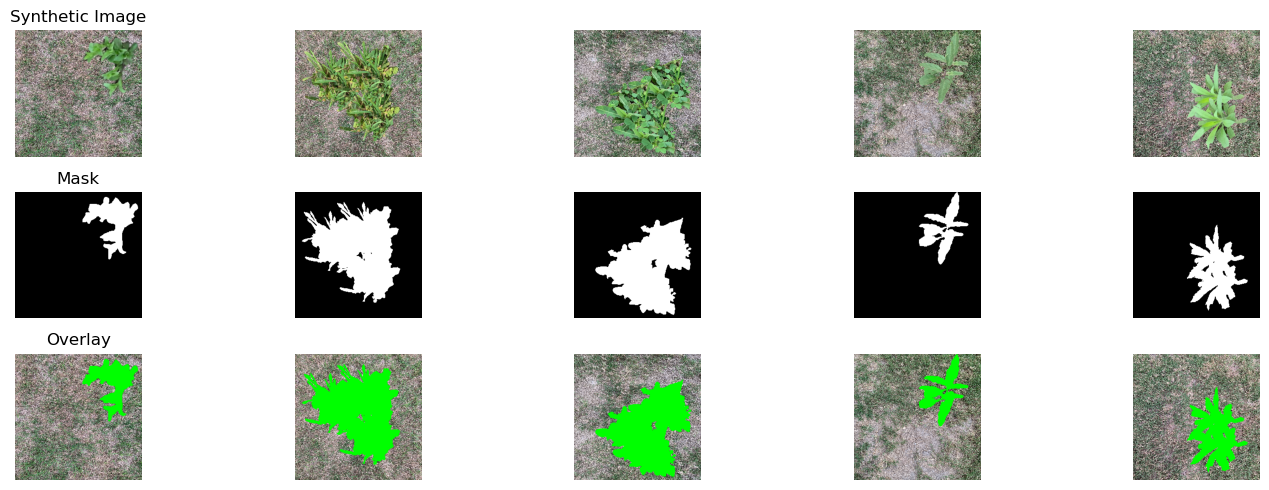

Generated and saved images 0 to 99
Generated and saved images 100 to 199
Generated and saved images 200 to 299
Generated and saved images 300 to 399
Generated and saved images 400 to 499
Generated and saved images 500 to 599
Generated and saved images 600 to 699
Generated and saved images 700 to 799
Generated and saved images 800 to 899
Generated and saved images 900 to 999
Done!


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths for datasets
BACKGROUND_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\input\backgrounds"
WEED_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\input\foregrounds\allweeds\weed"
OUTPUT_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output"

# Create output directories if they don't exist
os.makedirs(os.path.join(OUTPUT_DIR, "images"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "masks"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "visualization"), exist_ok=True)

def load_images(directory, size=(256, 256), alpha=False):
    """Load and resize images from a directory."""
    images = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED if alpha else cv2.IMREAD_COLOR)
            if img is not None:
                # Calculate resize ratio to maintain aspect ratio
                if alpha:
                    h, w = img.shape[:2]
                    # Keep weed images smaller than background
                    target_size = (size[0] // 2, size[1] // 2)
                    ratio = min(target_size[0] / w, target_size[1] / h)
                    new_size = (int(w * ratio), int(h * ratio))
                    img = cv2.resize(img, new_size)
                else:
                    img = cv2.resize(img, size)
                images.append(img)
    return images  # Return as list instead of numpy array for varying sizes

def save_batch(images, masks, start_idx):
    """Save generated images and masks to disk."""
    for idx, (image, mask) in enumerate(zip(images, masks)):
        # Save synthetic image
        image_path = os.path.join(OUTPUT_DIR, "images", f"synthetic_{start_idx + idx}.png")
        cv2.imwrite(image_path, image)
        
        # Save mask
        mask_path = os.path.join(OUTPUT_DIR, "masks", f"mask_{start_idx + idx}.png")
        cv2.imwrite(mask_path, mask)
        
        # Create and save visualization
        vis_img = image.copy()
        vis_img[mask[:, :, 0] > 0] = [0, 255, 0]  # Highlight weeds in green
        vis_path = os.path.join(OUTPUT_DIR, "visualization", f"vis_{start_idx + idx}.png")
        cv2.imwrite(vis_path, vis_img)

def display_samples(images, masks, num_samples=5):
    """Display sample synthetic images with their masks."""
    plt.figure(figsize=(15, 5))
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    for idx, i in enumerate(indices):
        # Original image
        plt.subplot(3, num_samples, idx + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if idx == 0:
            plt.title('Synthetic Image')
            
        # Mask
        plt.subplot(3, num_samples, num_samples + idx + 1)
        plt.imshow(masks[i], cmap='gray')
        plt.axis('off')
        if idx == 0:
            plt.title('Mask')
            
        # Overlay
        overlay = images[i].copy()
        overlay[masks[i, :, :, 0] > 0] = [0, 255, 0]
        plt.subplot(3, num_samples, 2*num_samples + idx + 1)
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if idx == 0:
            plt.title('Overlay')
    
    plt.tight_layout()
    plt.show()

def generate_synthetic_data(backgrounds, weeds, num_samples=1000, batch_size=100):
    """Generate synthetic images by overlaying weeds on background images."""
    for batch_start in range(0, num_samples, batch_size):
        batch_samples = min(batch_size, num_samples - batch_start)
        synthetic_images, masks = [], []
        
        for _ in range(batch_samples):
            # Select random background and weed images
            background = backgrounds[np.random.randint(len(backgrounds))].copy()
            weed = weeds[np.random.randint(len(weeds))]
            
            # Create mask with same size as background
            mask = np.zeros((background.shape[0], background.shape[1]), dtype=np.uint8)
            
            # Place weed in random positions
            for _ in range(np.random.randint(1, 4)):  # 1-3 weeds per image
                # Ensure weed fits within background
                max_x = background.shape[1] - weed.shape[1]
                max_y = background.shape[0] - weed.shape[0]
                
                if max_x > 0 and max_y > 0:  # Only place weed if it fits
                    x = np.random.randint(0, max_x)
                    y = np.random.randint(0, max_y)
                    
                    alpha = weed[:, :, 3] / 255.0  # Alpha channel for blending
                    
                    for c in range(3):  # Apply weed overlay
                        background[y:y+weed.shape[0], x:x+weed.shape[1], c] = (
                            alpha * weed[:, :, c] + 
                            (1 - alpha) * background[y:y+weed.shape[0], x:x+weed.shape[1], c]
                        )
                    mask[y:y+weed.shape[0], x:x+weed.shape[1]] = np.maximum(
                        mask[y:y+weed.shape[0], x:x+weed.shape[1]], 
                        (alpha > 0.5).astype(np.uint8) * 255
                    )
            
            synthetic_images.append(background)
            masks.append(mask)
        
        # Convert to numpy arrays
        synthetic_images = np.array(synthetic_images)
        masks = np.expand_dims(np.array(masks), axis=-1)
        
        # Save batch
        save_batch(synthetic_images, masks, batch_start)
        
        # Display samples from first batch
        if batch_start == 0:
            display_samples(synthetic_images, masks)
        
        print(f"Generated and saved images {batch_start} to {batch_start + batch_samples - 1}")
    
    return

def main():
    # Load images
    print("Loading background images...")
    backgrounds = load_images(BACKGROUND_DIR)
    print("Loading weed images...")
    weeds = load_images(WEED_DIR, alpha=True)
    
    print(f"Loaded {len(backgrounds)} backgrounds and {len(weeds)} weed images")
    
    if not backgrounds or not weeds:
        print("Error: No images found in one or both directories")
        return
        
    print("Generating synthetic images...")
    generate_synthetic_data(backgrounds, weeds, num_samples=1000)
    print("Done!")

if __name__ == "__main__":
    main()

Loading images...
Successfully loaded tomato image
Loaded 37 backgrounds and 80 weeds
Generating synthetic images...


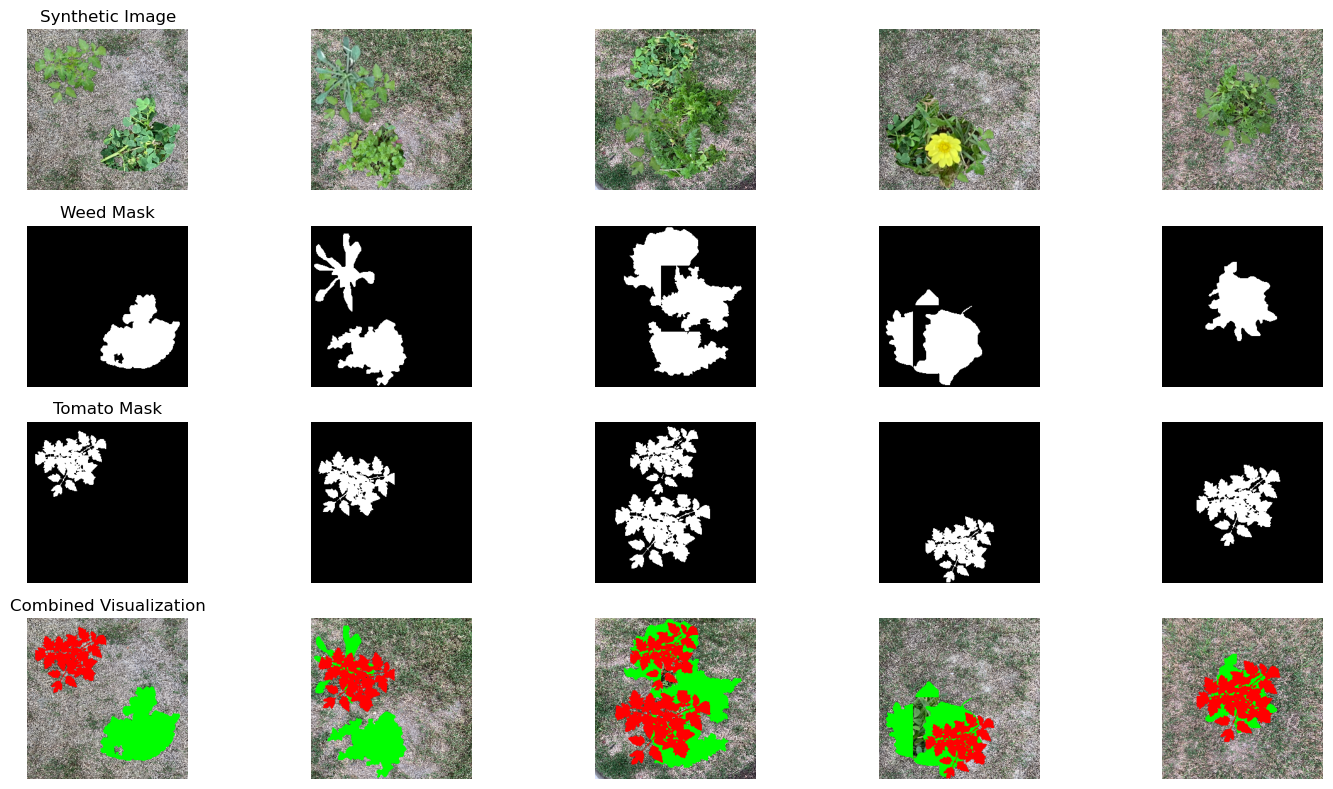

Generated and saved images 0 to 99
Generated and saved images 100 to 199
Generated and saved images 200 to 299
Generated and saved images 300 to 399
Generated and saved images 400 to 499
Generated and saved images 500 to 599
Generated and saved images 600 to 699
Generated and saved images 700 to 799
Generated and saved images 800 to 899
Generated and saved images 900 to 999
Done!


In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths for datasets
BACKGROUND_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\input\backgrounds"
WEED_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\input\foregrounds\allweeds\weed"
TOMATO_PATH = r"C:\Users\BRIJESH KUMAR GHADEI\Downloads\Screenshot 2024-11-01 150908_processed.png"
OUTPUT_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output"

# Create output directories
os.makedirs(os.path.join(OUTPUT_DIR, "images"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "masks"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "visualization"), exist_ok=True)

class_colors = {
    'background': [0, 0, 0],
    'weed': [0, 255, 0],
    'tomato': [0, 0, 255]
}

def load_images(directory, size=(256, 256), alpha=False, target_size_ratio=0.5):
    """Load and resize images from a directory."""
    images = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED if alpha else cv2.IMREAD_COLOR)
            if img is not None:
                if alpha:
                    h, w = img.shape[:2]
                    target_size = (int(size[0] * target_size_ratio), int(size[1] * target_size_ratio))
                    ratio = min(target_size[0] / w, target_size[1] / h)
                    new_size = (int(w * ratio), int(h * ratio))
                    img = cv2.resize(img, new_size)
                else:
                    img = cv2.resize(img, size)
                images.append(img)
    return images

def load_and_process_tomato(path, size=(256, 256)):
    """Load and process single tomato image with transparency."""
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise ValueError(f"Could not load tomato image from {path}")
    
    # If image doesn't have alpha channel, add it
    if img.shape[-1] != 4:
        # Convert to RGBA
        tmp = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
        # Create mask from non-black pixels
        mask = np.any(img > 20, axis=-1).astype(np.uint8) * 255
        tmp[:, :, 3] = mask
        img = tmp
    
    # Resize while maintaining aspect ratio
    h, w = img.shape[:2]
    target_size = (int(size[0] * 0.5), int(size[1] * 0.5))
    ratio = min(target_size[0] / w, target_size[1] / h)
    new_size = (int(w * ratio), int(h * ratio))
    img = cv2.resize(img, new_size)
    
    return img

def apply_random_transform(image):
    """Apply random transformations to create variations of the same image."""
    # Get image dimensions
    h, w = image.shape[:2]
    
    # Random scale (0.8 to 1.2)
    scale = np.random.uniform(0.8, 1.2)
    new_h, new_w = int(h * scale), int(w * scale)
    transformed = cv2.resize(image, (new_w, new_h))
    
    # Random rotation (-30 to 30 degrees)
    angle = np.random.uniform(-30, 30)
    matrix = cv2.getRotationMatrix2D((new_w/2, new_h/2), angle, 1)
    transformed = cv2.warpAffine(transformed, matrix, (new_w, new_h))
    
    # Random brightness variation
    if np.random.random() > 0.5:
        alpha = np.random.uniform(0.8, 1.2)  # Contrast
        beta = np.random.uniform(-20, 20)    # Brightness
        transformed = cv2.convertScaleAbs(transformed, alpha=alpha, beta=beta)
    
    return transformed

def create_multi_class_mask(shape, num_classes=3):
    """Create a mask array for multiple classes."""
    return np.zeros((shape[0], shape[1], num_classes), dtype=np.uint8)

def save_batch(images, masks, start_idx):
    """Save generated images and multi-class masks."""
    for idx, (image, mask) in enumerate(zip(images, masks)):
        # Save synthetic image
        image_path = os.path.join(OUTPUT_DIR, "images", f"synthetic_{start_idx + idx}.png")
        cv2.imwrite(image_path, image)
        
        # Save combined mask as a single PNG with different values for each class
        combined_mask = np.zeros(mask.shape[:2], dtype=np.uint8)
        for i in range(1, mask.shape[-1]):  # Skip background
            combined_mask[mask[:, :, i] > 0] = i
        
        mask_path = os.path.join(OUTPUT_DIR, "masks", f"mask_{start_idx + idx}.png")
        cv2.imwrite(mask_path, combined_mask)
        
        # Create visualization
        vis_img = image.copy()
        for class_idx, color in enumerate(class_colors.values()):
            if class_idx > 0:  # Skip background
                vis_img[mask[:, :, class_idx] > 0] = color
        
        vis_path = os.path.join(OUTPUT_DIR, "visualization", f"vis_{start_idx + idx}.png")
        cv2.imwrite(vis_path, vis_img)

def display_samples(images, masks, num_samples=5):
    """Display sample synthetic images with multi-class masks."""
    plt.figure(figsize=(15, 8))
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    for idx, i in enumerate(indices):
        # Original image
        plt.subplot(4, num_samples, idx + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if idx == 0:
            plt.title('Synthetic Image')
        
        # Weed mask
        plt.subplot(4, num_samples, num_samples + idx + 1)
        plt.imshow(masks[i][:, :, 1], cmap='gray')
        plt.axis('off')
        if idx == 0:
            plt.title('Weed Mask')
        
        # Tomato mask
        plt.subplot(4, num_samples, 2*num_samples + idx + 1)
        plt.imshow(masks[i][:, :, 2], cmap='gray')
        plt.axis('off')
        if idx == 0:
            plt.title('Tomato Mask')
        
        # Combined visualization
        vis_img = images[i].copy()
        for class_idx, color in enumerate(class_colors.values()):
            if class_idx > 0:  # Skip background
                vis_img[masks[i][:, :, class_idx] > 0] = color
        plt.subplot(4, num_samples, 3*num_samples + idx + 1)
        plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if idx == 0:
            plt.title('Combined Visualization')
    
    plt.tight_layout()
    plt.show()

def generate_synthetic_data(backgrounds, weeds, tomato_img, num_samples=1000, batch_size=100):
    """Generate synthetic images with both weeds and transformed tomato plants."""
    for batch_start in range(0, num_samples, batch_size):
        batch_samples = min(batch_size, num_samples - batch_start)
        synthetic_images, masks = [], []
        
        for _ in range(batch_samples):
            background = backgrounds[np.random.randint(len(backgrounds))].copy()
            mask = create_multi_class_mask(background.shape)
            
            # Set background class
            mask[:, :, 0] = 255
            
            # Add tomatoes (1-2 plants with variations)
            for _ in range(np.random.randint(1, 3)):
                # Create variation of tomato image
                tomato = apply_random_transform(tomato_img.copy())
                
                max_x = background.shape[1] - tomato.shape[1]
                max_y = background.shape[0] - tomato.shape[0]
                
                if max_x > 0 and max_y > 0:
                    x = np.random.randint(0, max_x)
                    y = np.random.randint(0, max_y)
                    
                    alpha = tomato[:, :, 3] / 255.0 if tomato.shape[-1] == 4 else np.ones(tomato.shape[:2])
                    
                    for c in range(3):
                        background[y:y+tomato.shape[0], x:x+tomato.shape[1], c] = (
                            alpha * tomato[:, :, c] + 
                            (1 - alpha) * background[y:y+tomato.shape[0], x:x+tomato.shape[1], c]
                        )
                    
                    # Update tomato mask (class index 2)
                    mask[y:y+tomato.shape[0], x:x+tomato.shape[1], 2] = (alpha > 0.5).astype(np.uint8) * 255
                    mask[y:y+tomato.shape[0], x:x+tomato.shape[1], 0] = 0  # Remove background where tomato exists
            
            # Add weeds (1-3 plants)
            for _ in range(np.random.randint(1, 4)):
                weed = weeds[np.random.randint(len(weeds))]
                max_x = background.shape[1] - weed.shape[1]
                max_y = background.shape[0] - weed.shape[0]
                
                if max_x > 0 and max_y > 0:
                    x = np.random.randint(0, max_x)
                    y = np.random.randint(0, max_y)
                    
                    alpha = weed[:, :, 3] / 255.0
                    
                    for c in range(3):
                        background[y:y+weed.shape[0], x:x+weed.shape[1], c] = (
                            alpha * weed[:, :, c] + 
                            (1 - alpha) * background[y:y+weed.shape[0], x:x+weed.shape[1], c]
                        )
                    
                    # Update weed mask (class index 1)
                    weed_mask = (alpha > 0.5).astype(np.uint8) * 255
                    mask[y:y+weed.shape[0], x:x+weed.shape[1], 1] = weed_mask
                    # Remove background where weed exists
                    mask[y:y+weed.shape[0], x:x+weed.shape[1], 0] = 0
            
            synthetic_images.append(background)
            masks.append(mask)
        
        synthetic_images = np.array(synthetic_images)
        masks = np.array(masks)
        
        save_batch(synthetic_images, masks, batch_start)
        
        if batch_start == 0:
            display_samples(synthetic_images, masks)
        
        print(f"Generated and saved images {batch_start} to {batch_start + batch_samples - 1}")
    
    return

def main():
    print("Loading images...")
    backgrounds = load_images(BACKGROUND_DIR)
    weeds = load_images(WEED_DIR, alpha=True)
    
    try:
        tomato_img = load_and_process_tomato(TOMATO_PATH)
        print("Successfully loaded tomato image")
    except Exception as e:
        print(f"Error loading tomato image: {e}")
        return
    
    print(f"Loaded {len(backgrounds)} backgrounds and {len(weeds)} weeds")
    
    if not all([backgrounds, weeds, tomato_img is not None]):
        print("Error: No images found in one or more directories")
        return
        
    print("Generating synthetic images...")
    generate_synthetic_data(backgrounds, weeds, tomato_img, num_samples=1000)
    print("Done!")

if __name__ == "__main__":
    main()

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

class LightweightUNet(nn.Module):
    def __init__(self, n_classes=3):
        super(LightweightUNet, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self._conv_block(3, 32)
        self.enc2 = self._conv_block(32, 64)
        self.enc3 = self._conv_block(64, 128)
        self.enc4 = self._conv_block(128, 256)
        
        # Decoder (upsampling)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec3 = self._conv_block(256, 128)  # 256 because of skip connection
        
        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = self._conv_block(128, 64)
        
        self.up1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.dec1 = self._conv_block(64, 32)
        
        self.final = nn.Conv2d(32, n_classes, kernel_size=1)
        self.max_pool = nn.MaxPool2d(2)
        
    def _conv_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        # Encoder path
        e1 = self.enc1(x)
        p1 = self.max_pool(e1)
        
        e2 = self.enc2(p1)
        p2 = self.max_pool(e2)
        
        e3 = self.enc3(p2)
        p3 = self.max_pool(e3)
        
        # Bridge
        e4 = self.enc4(p3)
        
        # Decoder path
        d3 = self.up3(e4)
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dec3(d3)
        
        d2 = self.up2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dec2(d2)
        
        d1 = self.up1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)
        
        return self.final(d1)

class PlantSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = [img for img in sorted(os.listdir(image_dir)) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name.replace('synthetic', 'mask'))
        
        # Read image and mask
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Convert mask to one-hot encoding
        mask_one_hot = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.float32)
        for i in range(3):  # 3 classes: background, weed, tomato
            mask_one_hot[:, :, i] = (mask == i).astype(np.float32)
        
        if self.transform:
            augmented = self.transform(image=image, mask=mask_one_hot)
            image = augmented['image']
            mask_one_hot = augmented['mask']
        
        return image, mask_one_hot

def get_transforms(train=True):
    if train:
        return A.Compose([
            A.RandomRotate90(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    
    with tqdm(dataloader, desc='Training') as pbar:
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            pbar.set_postfix({'loss': loss.item()})
    
    return total_loss / len(dataloader)

def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    
    with torch.no_grad():
        with tqdm(dataloader, desc='Validation') as pbar:
            for images, masks in pbar:
                images = images.to(device)
                masks = masks.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, masks)
                
                total_loss += loss.item()
                pbar.set_postfix({'loss': loss.item()})
    
    return total_loss / len(dataloader)

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training History')
    plt.legend()
    plt.savefig('training_history.png')
    plt.close()

def main():
    # Paths and parameters
    TRAIN_IMG_DIR = "path/to/train/images"
    TRAIN_MASK_DIR = "path/to/train/masks"
    VAL_IMG_DIR = "path/to/val/images"
    VAL_MASK_DIR = "path/to/val/masks"
    
    BATCH_SIZE = 8
    NUM_EPOCHS = 50
    LEARNING_RATE = 0.001
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Create datasets and dataloaders
    train_dataset = PlantSegmentationDataset(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        transform=get_transforms(train=True)
    )
    
    val_dataset = PlantSegmentationDataset(
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        transform=get_transforms(train=False)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=4,
        pin_memory=True
    )
    
    # Initialize model, criterion, optimizer and scheduler
    model = LightweightUNet().to(DEVICE)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='min',
        patience=5,
        factor=0.5,
        verbose=True
    )
    
    # Training loop
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    
    print(f"Training on device: {DEVICE}")
    print(f"Total training samples: {len(train_dataset)}")
    print(f"Total validation samples: {len(val_dataset)}")
    
    for epoch in range(NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
        
        # Train
        train_loss = train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
        train_losses.append(train_loss)
        
        # Validate
        val_loss = validate(model, val_loader, criterion, DEVICE)
        val_losses.append(val_loss)
        
        print(f"Train Loss: {train_loss:.4f}")
        print(f"Val Loss: {val_loss:.4f}")
        
        # Update scheduler
        scheduler.step(val_loss)
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            print(f"Saving best model with validation loss: {best_val_loss:.4f}")
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss,
            }, 'best_model.pth')
        
        # Save checkpoint every 10 epochs
        if (epoch + 1) % 10 == 0:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': train_loss,
                'val_loss': val_loss,
            }, f'checkpoint_epoch_{epoch+1}.pth')
    
    # Plot and save training history
    plot_training_history(train_losses, val_losses)
    print("Training completed!")

if __name__ == "__main__":
    main()

C:\ANACONDA3\envs\gpu\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path/to/train/images'

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Paths
SYNTHETIC_DATA_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output\images"
MASK_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output\masks"
VISUALIZATION_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output\visualization"

class LightweightUNet(nn.Module):
    def __init__(self, n_classes=3):
        super(LightweightUNet, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self._conv_block(3, 32)
        self.enc2 = self._conv_block(32, 64)
        self.enc3 = self._conv_block(64, 128)
        self.enc4 = self._conv_block(128, 256)
        
        # Decoder (upsampling)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec3 = self._conv_block(256, 128)
        
        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = self._conv_block(128, 64)
        
        self.up1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.dec1 = self._conv_block(64, 32)
        
        self.final = nn.Conv2d(32, n_classes, kernel_size=1)
        self.max_pool = nn.MaxPool2d(2)
        
    def _conv_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        # Encoder path
        e1 = self.enc1(x)
        p1 = self.max_pool(e1)
        
        e2 = self.enc2(p1)
        p2 = self.max_pool(e2)
        
        e3 = self.enc3(p2)
        p3 = self.max_pool(e3)
        
        # Bridge
        e4 = self.enc4(p3)
        
        # Decoder path
        d3 = self.up3(e4)
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dec3(d3)
        
        d2 = self.up2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dec2(d2)
        
        d1 = self.up1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)
        
        return self.final(d1)

class PlantSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = [img for img in sorted(os.listdir(image_dir)) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name.replace('synthetic', 'mask'))
        
        # Load the image and mask
        image = cv2.imread(img_path)
        if image is None:
            raise ValueError(f"Image not found at {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            raise ValueError(f"Mask not found at {mask_path}")
        
        # Create one-hot encoded mask
        mask_one_hot = np.zeros((3, mask.shape[0], mask.shape[1]), dtype=np.float32)
        for i in range(3):
            mask_one_hot[i, :, :] = (mask == i).astype(np.float32)
        
        if self.transform:
            augmented = self.transform(image=image, mask=mask_one_hot.transpose(1, 2, 0))
            image = augmented['image']
            mask_one_hot = augmented['mask'].permute(2, 0, 1)  # Change from HWC to CHW format
        
        return image, mask_one_hot

def get_transforms(train=True):
    if train:
        return A.Compose([
            A.RandomRotate90(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training History')
    plt.legend()
    plt.savefig('training_history.png')
    plt.close()

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    with tqdm(dataloader, desc='Training') as pbar:
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pbar.set_postfix({'loss': total_loss / len(dataloader)})
    
    return total_loss / len(dataloader)

def main():
    # Set up paths and parameters
    BATCH_SIZE = 8
    NUM_EPOCHS = 50
    LEARNING_RATE = 0.001
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Datasets and loaders
    train_dataset = PlantSegmentationDataset(
        SYNTHETIC_DATA_DIR,
        MASK_DIR,
        transform=get_transforms(train=True)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )
    
    # Initialize model, criterion, optimizer
    model = LightweightUNet().to(DEVICE)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)
    
    # Training loop
    train_losses = []
    
    for epoch in range(NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
        
        # Train
        train_loss = train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
        train_losses.append(train_loss)
        
        print(f"Train Loss: {train_loss:.4f}")
        
        scheduler.step(train_loss)

    # Plot and save training history
    plot_training_history(train_losses, [])
    print("Training completed!")

if __name__ == "__main__":
    main()



Epoch 1/50


Training:   0%|                                                                                | 0/125 [00:05<?, ?it/s]


RuntimeError: DataLoader worker (pid(s) 20880, 8500, 16760, 8776) exited unexpectedly

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Paths
SYNTHETIC_DATA_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output\images"
MASK_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output\masks"
VISUALIZATION_DIR = r"C:\IMMAGE ANALYSIS PROJECT DATASET\weed\weeds\output\visualization"

class LightweightUNet(nn.Module):
    def __init__(self, n_classes=3):
        super(LightweightUNet, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self._conv_block(3, 32)
        self.enc2 = self._conv_block(32, 64)
        self.enc3 = self._conv_block(64, 128)
        self.enc4 = self._conv_block(128, 256)
        
        # Decoder (upsampling)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec3 = self._conv_block(256, 128)
        
        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec2 = self._conv_block(128, 64)
        
        self.up1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.dec1 = self._conv_block(64, 32)
        
        self.final = nn.Conv2d(32, n_classes, kernel_size=1)
        self.max_pool = nn.MaxPool2d(2)
        
    def _conv_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        # Encoder path
        e1 = self.enc1(x)
        p1 = self.max_pool(e1)
        
        e2 = self.enc2(p1)
        p2 = self.max_pool(e2)
        
        e3 = self.enc3(p2)
        p3 = self.max_pool(e3)
        
        # Bridge
        e4 = self.enc4(p3)
        
        # Decoder path
        d3 = self.up3(e4)
        d3 = torch.cat([d3, e3], dim=1)
        d3 = self.dec3(d3)
        
        d2 = self.up2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.dec2(d2)
        
        d1 = self.up1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)
        
        return self.final(d1)

class PlantSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = [img for img in sorted(os.listdir(image_dir)) if img.endswith(('.png', '.jpg', '.jpeg'))]
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        mask_path = os.path.join(self.mask_dir, img_name.replace('synthetic', 'mask'))
        
        try:
            # Load image
            image = cv2.imread(img_path)
            if image is None:
                raise ValueError(f"Image not found or unable to read at {img_path}")
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Load mask
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Mask not found or unable to read at {mask_path}")
            
            # One-hot encode mask
            mask_one_hot = np.zeros((3, mask.shape[0], mask.shape[1]), dtype=np.float32)
            for i in range(3):
                mask_one_hot[i, :, :] = (mask == i).astype(np.float32)

            # Apply transformations
            if self.transform:
                augmented = self.transform(image=image, mask=mask_one_hot.transpose(1, 2, 0))
                image = augmented['image']
                mask_one_hot = augmented['mask'].permute(2, 0, 1)  # Change from HWC to CHW format

            return image, mask_one_hot
        
        except Exception as e:
            print(f"Error loading file {img_name}: {e}")
            raise

def get_transforms(train=True):
    if train:
        return A.Compose([
            A.RandomRotate90(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training History')
    plt.legend()
    plt.savefig('training_history.png')
    plt.close()

def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    
    with tqdm(dataloader, desc='Training') as pbar:
        for images, masks in pbar:
            images = images.to(device)
            masks = masks.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            pbar.set_postfix(loss=loss.item())
    
    return total_loss / len(dataloader)

def main():
    # Set up paths and parameters
    BATCH_SIZE = 4  # Reduced batch size
    NUM_EPOCHS = 50
    LEARNING_RATE = 0.001
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Datasets and loaders
    train_dataset = PlantSegmentationDataset(
        SYNTHETIC_DATA_DIR,
        MASK_DIR,
        transform=get_transforms(train=True)
    )
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=0,  # No multiprocessing
        pin_memory=True
    )
    
    # Initialize model, criterion, optimizer
    model = LightweightUNet().to(DEVICE)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # Training loop
    train_losses = []
    
    for epoch in range(NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
        
        # Train
        train_loss = train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
        train_losses.append(train_loss)
        
        print(f"Train Loss: {train_loss:.4f}")
    
    # Plot and save training history
    plot_training_history(train_losses, [])
    print("Training completed!")

if __name__ == "__main__":
    main()



Epoch 1/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:42<00:00,  5.91it/s, loss=0.135]


Train Loss: 0.2920

Epoch 2/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.35it/s, loss=0.146]


Train Loss: 0.1341

Epoch 3/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0808]


Train Loss: 0.1158

Epoch 4/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.32it/s, loss=0.0914]


Train Loss: 0.1102

Epoch 5/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.101]


Train Loss: 0.1037

Epoch 6/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s, loss=0.101]


Train Loss: 0.1028

Epoch 7/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s, loss=0.113]


Train Loss: 0.1007

Epoch 8/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s, loss=0.109]


Train Loss: 0.1005

Epoch 9/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s, loss=0.0988]


Train Loss: 0.0965

Epoch 10/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.30it/s, loss=0.128]


Train Loss: 0.0967

Epoch 11/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s, loss=0.116]


Train Loss: 0.0957

Epoch 12/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.28it/s, loss=0.0779]


Train Loss: 0.0921

Epoch 13/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.116]


Train Loss: 0.0912

Epoch 14/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0936]


Train Loss: 0.0908

Epoch 15/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.30it/s, loss=0.0757]


Train Loss: 0.0884

Epoch 16/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s, loss=0.0739]


Train Loss: 0.0874

Epoch 17/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s, loss=0.0539]


Train Loss: 0.0873

Epoch 18/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.20it/s, loss=0.0687]


Train Loss: 0.0874

Epoch 19/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s, loss=0.0987]


Train Loss: 0.0851

Epoch 20/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.21it/s, loss=0.121]


Train Loss: 0.0850

Epoch 21/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  7.08it/s, loss=0.0464]


Train Loss: 0.0831

Epoch 22/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  7.07it/s, loss=0.0915]


Train Loss: 0.0823

Epoch 23/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s, loss=0.087]


Train Loss: 0.0840

Epoch 24/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s, loss=0.0801]


Train Loss: 0.0810

Epoch 25/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.26it/s, loss=0.0842]


Train Loss: 0.0802

Epoch 26/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0753]


Train Loss: 0.0793

Epoch 27/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s, loss=0.0571]


Train Loss: 0.0793

Epoch 28/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0858]


Train Loss: 0.0784

Epoch 29/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0595]


Train Loss: 0.0773

Epoch 30/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0684]


Train Loss: 0.0772

Epoch 31/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.35it/s, loss=0.0689]


Train Loss: 0.0763

Epoch 32/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.35it/s, loss=0.068]


Train Loss: 0.0771

Epoch 33/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0862]


Train Loss: 0.0756

Epoch 34/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0922]


Train Loss: 0.0753

Epoch 35/50


Training: 100%|████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.32it/s, loss=0.1]


Train Loss: 0.0752

Epoch 36/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.32it/s, loss=0.0954]


Train Loss: 0.0746

Epoch 37/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.36it/s, loss=0.0986]


Train Loss: 0.0743

Epoch 38/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0352]


Train Loss: 0.0734

Epoch 39/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.35it/s, loss=0.0671]


Train Loss: 0.0729

Epoch 40/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0448]


Train Loss: 0.0726

Epoch 41/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0581]


Train Loss: 0.0721

Epoch 42/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.35it/s, loss=0.0328]


Train Loss: 0.0718

Epoch 43/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.35it/s, loss=0.0766]


Train Loss: 0.0718

Epoch 44/50


Training: 100%|███████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.32it/s, loss=0.08]


Train Loss: 0.0713

Epoch 45/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0648]


Train Loss: 0.0704

Epoch 46/50


Training: 100%|██████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.127]


Train Loss: 0.0699

Epoch 47/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0434]


Train Loss: 0.0712

Epoch 48/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s, loss=0.0574]


Train Loss: 0.0689

Epoch 49/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.31it/s, loss=0.0491]


Train Loss: 0.0694

Epoch 50/50


Training: 100%|█████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s, loss=0.0717]


Train Loss: 0.0692
Training completed!


In [2]:
import torch
import cv2
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from PIL import Image
import os

# Import your model architecture
from your_training_file import LightweightUNet  # Make sure this points to your training file

class PlantPredictor:
    def __init__(self, model_path, device=None):
        self.device = device if device else torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Initialize model
        self.model = LightweightUNet(n_classes=3)
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        self.model.to(self.device)
        self.model.eval()
        
        # Define preprocessing transforms
        self.transform = A.Compose([
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])
    
    def preprocess_image(self, image):
        # Convert BGR to RGB if needed
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transforms
        augmented = self.transform(image=image)
        image_tensor = augmented['image']
        
        # Add batch dimension
        image_tensor = image_tensor.unsqueeze(0)
        return image_tensor
    
    def predict(self, image):
        """
        Make prediction on a single image
        Args:
            image: numpy array of shape (H, W, C)
        Returns:
            predicted_mask: numpy array of shape (H, W) with class labels
        """
        with torch.no_grad():
            # Preprocess image
            image_tensor = self.preprocess_image(image)
            image_tensor = image_tensor.to(self.device)
            
            # Make prediction
            output = self.model(image_tensor)
            output = torch.sigmoid(output)
            
            # Get class predictions
            predicted_mask = torch.argmax(output, dim=1)
            predicted_mask = predicted_mask.cpu().numpy()[0]  # Remove batch dimension
            
            return predicted_mask
    
    def visualize_prediction(self, image, predicted_mask, save_path=None):
        """
        Visualize the prediction results
        Args:
            image: original image (numpy array)
            predicted_mask: predicted segmentation mask
            save_path: path to save the visualization
        """
        # Create a figure with two subplots
        plt.figure(figsize=(12, 6))
        
        # Plot original image
        plt.subplot(121)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Plot predicted mask
        plt.subplot(122)
        plt.imshow(predicted_mask, cmap='viridis')
        plt.title('Predicted Segmentation')
        plt.axis('off')
        
        if save_path:
            plt.savefig(save_path)
            plt.close()
        else:
            plt.show()

def main():
    # Paths
    MODEL_PATH = 'DOMAIN COURSE/IMAGE ANALYSYS BY  DEEP LEARNING/PROJECT/v4/saved_models/model_epoch_50.pt'  # Update this with your model path
    INPUT_DIR = 'path/to/input/images'  # Update this with your input images directory
    OUTPUT_DIR = 'path/to/output/predictions'  # Update this with your desired output directory
    
    # Create output directory if it doesn't exist
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    # Initialize predictor
    predictor = PlantPredictor(MODEL_PATH)
    
    # Process all images in the input directory
    for image_name in os.listdir(INPUT_DIR):
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Read image
            image_path = os.path.join(INPUT_DIR, image_name)
            image = cv2.imread(image_path)
            
            if image is None:
                print(f"Could not read image: {image_path}")
                continue
            
            # Make prediction
            predicted_mask = predictor.predict(image)
            
            # Save visualization
            output_path = os.path.join(OUTPUT_DIR, f'pred_{image_name}')
            predictor.visualize_prediction(
                image, 
                predicted_mask,
                save_path=output_path
            )
            
            print(f"Processed {image_name}")

if __name__ == "__main__":
    main()

C:\ANACONDA3\envs\gpu\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


ModuleNotFoundError: No module named 'your_training_file'